In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'D2Coding'

In [3]:
yangChenData = pd.read_csv('양천구 전체 데이터(범주적용안함).csv')
gangNamData = pd.read_csv('강남구 전체 데이터(범주적용안함).csv')
gangDongData = pd.read_csv('강동구 전체 데이터(범주적용안함).csv')


In [4]:
yangChenData

날짜  평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  강수량(mm)  평균풍속(m/s)  \
0     2014-08-02     31.4     35.8     28.7       55.0      0.0        3.9   
1     2014-08-03     26.5     30.5     24.1       87.6     13.0        4.2   
2     2014-08-04     26.4     29.6     24.7       93.0      6.5        2.1   
3     2014-08-05     26.6     29.2     25.0       87.5      0.0        3.2   
4     2014-08-06     24.4     26.2     22.5       92.4     10.5        2.2   
...          ...      ...      ...      ...        ...      ...        ...   
3308  2023-12-27      1.5      6.8     -2.8       76.6      0.0        1.4   
3309  2023-12-28      1.2      4.4     -1.7       69.5      0.0        1.6   
3310  2023-12-29      1.3      4.6     -1.5       71.0      0.0        1.7   
3311  2023-12-30      0.6      2.1     -0.9       92.0     13.1        2.6   
3312  2023-12-31      2.1      4.3      0.6       95.5      4.7        2.0   

      최대풍속(m/s)  최대풍속풍향(deg)  PM10  PM2.5     오 존   이산화질소  일산화탄소   아황산가스  
0           6.3        110.0  11.0    8.0  0.0180  0.0150   0.20  0.0050  
1           7.0         70.0   9.0    5.0  0.0170  0.0140   0.20  0.0050  
2           4.7        230.0  10.0    8.0  0.0150  0.0210   0.30  0.0050  
3           4.8        230.0  47.0   29.0  0.0290  0.0180   0.40  0.0060  
4           4.9        230.0  37.0   23.0  0.0250  0.0310   0.40  0.0050  
...         ...          ...   ...    ...     ...     ...    ...     ...  
3308        3.0         50.0  89.0   70.0  0.0050  0.0652   1.14  0.0040  
3309        4.7        290.0  58.0   48.0  0.0084  0.0499   0.86  0.0038  
3310        3.3        270.0  44.0   34.0  0.0076  0.0468   0.78  0.0034  
3311        4.6         50.0  43.0   36.0  0.0054  0.0434   0.74  0.0027  
3312        5.0        320.0  27.0   22.0  0.0164  0.0315   0.73  0.0030  

[3313 rows x 15 columns]

In [5]:
totalData = pd.concat([yangChenData, gangNamData, gangDongData], ignore_index=True)
totalData

날짜  평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  강수량(mm)  평균풍속(m/s)  \
0     2014-08-02     31.4     35.8     28.7       55.0      0.0        3.9   
1     2014-08-03     26.5     30.5     24.1       87.6     13.0        4.2   
2     2014-08-04     26.4     29.6     24.7       93.0      6.5        2.1   
3     2014-08-05     26.6     29.2     25.0       87.5      0.0        3.2   
4     2014-08-06     24.4     26.2     22.5       92.4     10.5        2.2   
...          ...      ...      ...      ...        ...      ...        ...   
9946  2023-12-27      1.5      6.8     -2.8       76.6      0.0        1.4   
9947  2023-12-28      1.2      4.4     -1.7       69.5      0.0        1.6   
9948  2023-12-29      1.3      4.6     -1.5       71.0      0.0        1.7   
9949  2023-12-30      0.6      2.1     -0.9       92.0     13.1        2.6   
9950  2023-12-31      2.1      4.3      0.6       95.5      4.7        2.0   

      최대풍속(m/s)  최대풍속풍향(deg)  PM10  PM2.5     오 존   이산화질소  일산화탄소   아황산가스  
0           6.3        110.0  11.0    8.0  0.0180  0.0150   0.20  0.0050  
1           7.0         70.0   9.0    5.0  0.0170  0.0140   0.20  0.0050  
2           4.7        230.0  10.0    8.0  0.0150  0.0210   0.30  0.0050  
3           4.8        230.0  47.0   29.0  0.0290  0.0180   0.40  0.0060  
4           4.9        230.0  37.0   23.0  0.0250  0.0310   0.40  0.0050  
...         ...          ...   ...    ...     ...     ...    ...     ...  
9946        3.0         50.0  68.0   52.0  0.0075  0.0519   0.95  0.0028  
9947        4.7        290.0  49.0   40.0  0.0074  0.0466   0.90  0.0028  
9948        3.3        270.0  43.0   34.0  0.0079  0.0435   0.87  0.0024  
9949        4.6         50.0  42.0   37.0  0.0056  0.0403   0.84  0.0020  
9950        5.0        320.0  19.0   16.0  0.0130  0.0345   0.97  0.0020  

[9951 rows x 15 columns]

In [7]:
corr_df = totalData
corr_df['날짜'] = pd.to_datetime(corr_df['날짜'])
corr_df['날짜'] = corr_df['날짜'].dt.strftime('%y%m%d').astype(int)
corr_df.info()
corr_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9951 entries, 0 to 9950
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           9951 non-null   int32  
 1   평균기온(℃)      9951 non-null   float64
 2   최고기온(℃)      9951 non-null   float64
 3   최저기온(℃)      9951 non-null   float64
 4   평균습도(%rh)    9951 non-null   float64
 5   강수량(mm)      9951 non-null   float64
 6   평균풍속(m/s)    9951 non-null   float64
 7   최대풍속(m/s)    9951 non-null   float64
 8   최대풍속풍향(deg)  9951 non-null   float64
 9   PM10         9951 non-null   float64
 10  PM2.5        9951 non-null   float64
 11  오 존          9951 non-null   float64
 12  이산화질소        9951 non-null   float64
 13  일산화탄소        9951 non-null   float64
 14  아황산가스        9951 non-null   float64
dtypes: float64(14), int32(1)
memory usage: 1.1 MB


날짜  평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  강수량(mm)  평균풍속(m/s)  \
0     140802     31.4     35.8     28.7       55.0      0.0        3.9   
1     140803     26.5     30.5     24.1       87.6     13.0        4.2   
2     140804     26.4     29.6     24.7       93.0      6.5        2.1   
3     140805     26.6     29.2     25.0       87.5      0.0        3.2   
4     140806     24.4     26.2     22.5       92.4     10.5        2.2   
...      ...      ...      ...      ...        ...      ...        ...   
9946  231227      1.5      6.8     -2.8       76.6      0.0        1.4   
9947  231228      1.2      4.4     -1.7       69.5      0.0        1.6   
9948  231229      1.3      4.6     -1.5       71.0      0.0        1.7   
9949  231230      0.6      2.1     -0.9       92.0     13.1        2.6   
9950  231231      2.1      4.3      0.6       95.5      4.7        2.0   

      최대풍속(m/s)  최대풍속풍향(deg)  PM10  PM2.5     오 존   이산화질소  일산화탄소   아황산가스  
0           6.3        110.0  11.0    8.0  0.0180  0.0150   0.20  0.0050  
1           7.0         70.0   9.0    5.0  0.0170  0.0140   0.20  0.0050  
2           4.7        230.0  10.0    8.0  0.0150  0.0210   0.30  0.0050  
3           4.8        230.0  47.0   29.0  0.0290  0.0180   0.40  0.0060  
4           4.9        230.0  37.0   23.0  0.0250  0.0310   0.40  0.0050  
...         ...          ...   ...    ...     ...     ...    ...     ...  
9946        3.0         50.0  68.0   52.0  0.0075  0.0519   0.95  0.0028  
9947        4.7        290.0  49.0   40.0  0.0074  0.0466   0.90  0.0028  
9948        3.3        270.0  43.0   34.0  0.0079  0.0435   0.87  0.0024  
9949        4.6         50.0  42.0   37.0  0.0056  0.0403   0.84  0.0020  
9950        5.0        320.0  19.0   16.0  0.0130  0.0345   0.97  0.0020  

[9951 rows x 15 columns]

In [8]:
corData = corr_df.corr()

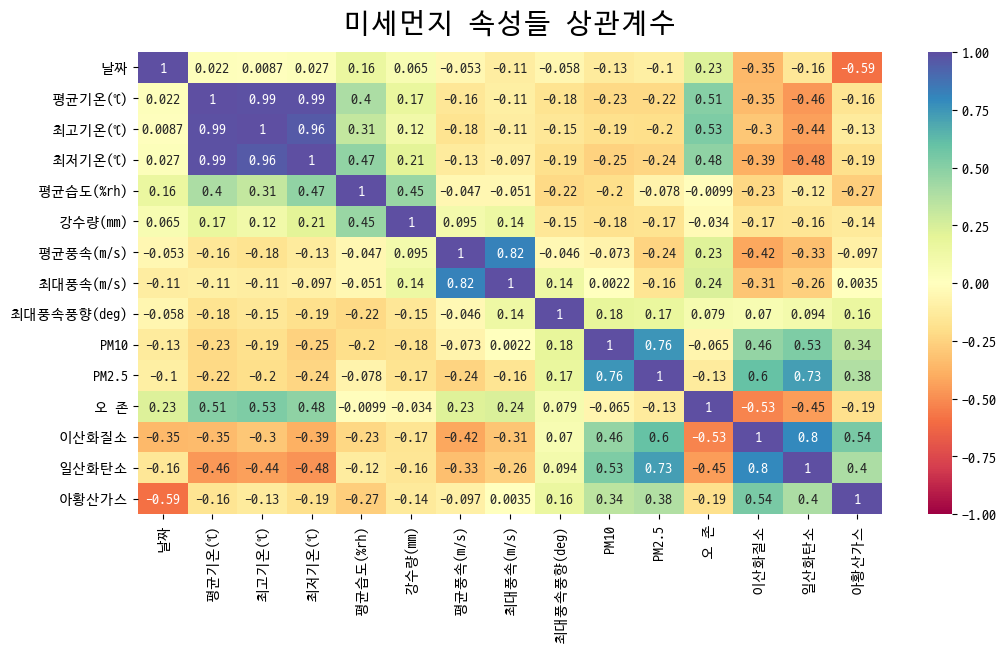

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(corData, vmin=-1, vmax=1, cmap='Spectral', annot=True)
plt.title('미세먼지 속성들 상관계수', pad=15, fontsize=20)
plt.show()